# Ce carnet a pour but de faire une analyse de la distribution spatiale de la population étudiée

In [5]:
### Noter qu'il faudra avoir installé toutes les librairies nécessaires
# dans l'environnement conda utilisé pour exécuter ce carnet
import pandas as pd
import geopandas as gpd
#from shapely.geometry import LineString
from geopandas.tools import sjoin
from geodatasets import get_path
#import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px
from itables import init_notebook_mode, show
import numpy as np
#import seaborn as sns
import json
import IPython
import nbformat 

In [6]:
### Librairies déjà installées avec Python
import pprint
import sqlite3 as sql
import sys
from importlib import reload
data1 = pd.read_csv("CSV/analyse_personne_spatiale_1.csv")
data1.head(3)

,fk_lieu,lieu_naissance,eff,geo_coord
0,http://www.wikidata.org/entity/Q649,Moscow,70,Point(37.617777777 55.755833333)
1,http://www.wikidata.org/entity/Q60,New York City,53,Point(-74.0 40.7)
2,http://www.wikidata.org/entity/Q2807,Madrid,45,Point(-3.703333333 40.416944444)


In [12]:
s = gpd.GeoSeries.from_wkt(data1.geo_coord[:5])
s

0     POINT (37.61778 55.75583)
1    POINT (-74.00000 40.70000)
2     POINT (-3.70333 40.41694)
3      POINT (4.89361 52.37278)
4     POINT (51.41667 35.70000)
dtype: geometry

In [13]:
birth_gdf = gpd.GeoDataFrame(
    data1[['fk_lieu', 'lieu_naissance', 'eff']],\
    geometry=gpd.GeoSeries.from_wkt(data1.geo_coord.to_list()), crs="EPSG:4326"
)

# On dispose ainsi du DataFrame GeoPandas avec la colonne indispensable 'geometry'
birth_gdf.head(3)

,fk_lieu,lieu_naissance,eff,geometry
0,http://www.wikidata.org/entity/Q649,Moscow,70,POINT (37.61778 55.75583)
1,http://www.wikidata.org/entity/Q60,New York City,53,POINT (-74.00000 40.70000)
2,http://www.wikidata.org/entity/Q2807,Madrid,45,POINT (-3.70333 40.41694)


In [14]:
### Inspection des données à afficher
birth_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   fk_lieu         3170 non-null   object  
 1   lieu_naissance  3170 non-null   object  
 2   eff             3170 non-null   int64   
 3   geometry        3170 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 99.2+ KB


# Création de la première carte
cela est un essai comme cette carte n'est pas forcément pertinente pour notre population joue avec les pts et non avec les pays!

In [15]:
### Récupérer la carte de base, qui est aussi un DataFrame GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_25049/1957264229.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [16]:
### Types de géométries
pprint.pp(world.crs)
print('-------\n')
pprint.pp(birth_gdf.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

-------

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



In [51]:
### Cartographier de toutes les naissances de personnes
# projection géographique

ax = world.plot(color="white", edgecolor="black", figsize=(15,10))

#ax.set_xlim([-0.1, 2])
ax.set_ylim([-60, 90])

# Noter que le diamètre du marqueur est fixe
birth_gdf.plot(ax=ax, color="red", markersize=0.5)

plt.show()

SyntaxError: incomplete input (3121794703.py, line 12)

In [52]:
ax = world.plot(color="white", edgecolor="black", figsize=(15,10))

# lon
ax.set_xlim([-20, 25])
# lat
ax.set_ylim([0, 40])

# Noter que le diamètre du marqueur est proportionnel aux effectifs du lieu
birth_gdf.plot(ax=ax, color="red", markersize=birth_gdf.eff)

plt.show()

SyntaxError: incomplete input (1955703110.py, line 11)

In [19]:
prj_world = world.copy(deep=True)
prj_world.geometry = prj_world.geometry.to_crs(900913)
pprint.pp(prj_world.crs)
print('------')
prj_birth_gdf = birth_gdf.copy(deep=True)
prj_birth_gdf.geometry = prj_birth_gdf.geometry.to_crs(900913)
pprint.pp(prj_birth_gdf.crs)

<Projected CRS: EPSG:900913>
Name: Google Maps Global Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

------
<Projected CRS: EPSG:900913>
Name: Google Maps Global Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,20))

ax1 = world.plot(color="white", ax=axes[0], edgecolor="black")
#ax.set_xlim([-0.1, 2])
ax1.set_ylim([-60, 90])

birth_gdf.plot(ax=axes[0], color="red", markersize=2)

ax2 = prj_world.plot(color="white", ax=axes[1], edgecolor="black")
#ax.set_xlim([-0.1, 2])
ax2.set_ylim([-8.5*10e5, 1.5*10e6])

prj_birth_gdf.plot(ax=axes[1], color="red", markersize=2)

plt.show()

SyntaxError: incomplete input (1589934504.py, line 15)

# Cartes avec périodes donc évolutive

In [21]:
data2 = pd.read_csv("analyse_personne_spatiale_2.csv")
data2.head(2)

,annee_naissance,fk_lieu,lieu_naissance,geo_coord
0,1816,http://www.wikidata.org/entity/Q3933,Celle,Point(10.0825 52.625555555)
1,1816,http://www.wikidata.org/entity/Q10531743,Härnösands domkyrkoförsamling,Point(17.941886111 62.631063888)


In [22]:
data2.tail(2)

,annee_naissance,fk_lieu,lieu_naissance,geo_coord
5594,1999,http://www.wikidata.org/entity/Q15699,León,Point(-5.566944444 42.598888888)
5595,1999,http://www.wikidata.org/entity/Q3630,Jakarta,Point(106.8275 -6.175)


In [23]:
l1 = [1801,1826,1851,1876]
l2 = list(range(1901, 2002, 10))
l_p = l1 + l2
print(l_p)

[1801, 1826, 1851, 1876, 1901, 1911, 1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001]


In [24]:
data2['annee_naissance'] = data2['annee_naissance'].astype(int)
data2['generations'] = pd.cut(data2['annee_naissance'], l_p, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
data2['generations'] = data2['generations'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
data2.head(3)

,annee_naissance,fk_lieu,lieu_naissance,geo_coord,generations
0,1816,http://www.wikidata.org/entity/Q3933,Celle,Point(10.0825 52.625555555),1801-1825
1,1816,http://www.wikidata.org/entity/Q10531743,Härnösands domkyrkoförsamling,Point(17.941886111 62.631063888),1801-1825
2,1816,http://www.wikidata.org/entity/Q487070,Dessau,Point(12.246111111 51.834166666),1801-1825


In [25]:
data2.tail(4)

,annee_naissance,fk_lieu,lieu_naissance,geo_coord,generations
5592,1999,http://www.wikidata.org/entity/Q191204,Sulaymaniyah,Point(45.433333333 35.55),1991-2000
5593,1999,http://www.wikidata.org/entity/Q334,Singapore,Point(103.8 1.3),1991-2000
5594,1999,http://www.wikidata.org/entity/Q15699,León,Point(-5.566944444 42.598888888),1991-2000
5595,1999,http://www.wikidata.org/entity/Q3630,Jakarta,Point(106.8275 -6.175),1991-2000


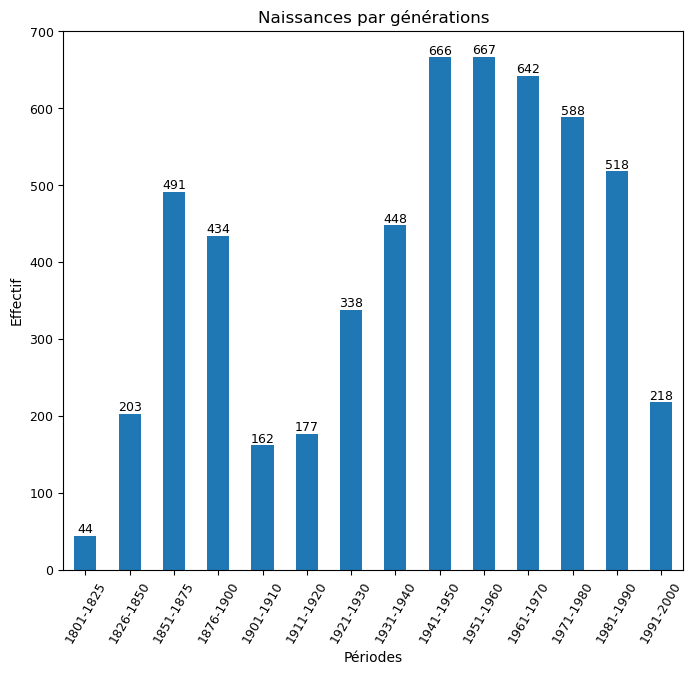

In [26]:
#peut-être revoir les générations
ax = data2.groupby(by='generations', observed=True).size().plot(kind='bar',
                                            rot=60, fontsize=9, figsize=(8,7))
ax.bar_label(ax.containers[0], fontsize=9)
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Naissances par générations')
plt.show()

In [27]:
cn = sql.connect('../base_donnee/S_2_militant.db')
cn

In [28]:
try:
    l = data2[['generations', 'fk_lieu', 'lieu_naissance', 'geo_coord']]\
             .to_sql(name='wdt_generations_birth_place', con=cn, if_exists='fail')
except Exception as e:
    print('Erreur: ',  e)

Erreur:  Table 'wdt_generations_birth_place' already exists.


In [29]:
df_gen_gr=pd.read_csv("analyse_personne_spatiale_3.csv")
df_gen_gr.geo_coord = df_gen_gr.geo_coord.apply(lambda x: x.replace('Point(', '')\
                                .replace(')',''))
df_gen_gr['long'] = df_gen_gr.geo_coord\
    .apply(lambda x: round(float((x.split(' ')[0])), 4))
df_gen_gr['lat'] = df_gen_gr.geo_coord\
    .apply(lambda x: round(float((x.split(' ')[1])), 4))

df_gen_gr.head()

,generations,lieu_naissance,geo_coord,effectif,long,lat
0,1801-1825,Boston,-71.057777777 42.360277777,1,-71.0578,42.3603
1,1801-1825,Stowe,-1.017 52.018,1,-1.0170,52.0180
2,1801-1825,Stuttgart,9.18 48.7775,1,9.1800,48.7775
3,1801-1825,Härnösands domkyrkoförsamling,17.941886111 62.631063888,1,17.9419,62.6311
4,1801-1825,Q10718453,16.573888888 57.658888888,1,16.5739,57.6589


In [30]:
size = [s if s != 0 else 0 for s in df_gen_gr.effectif]

fig = px.scatter_geo(
    df_gen_gr,
    lat="lat",
    lon="long",
    size=size,
    hover_name = "lieu_naissance",
    animation_frame="generations",
    width=1400, height=600,
    color_discrete_sequence=['red'],
    title="Evolution des lieux de naissance"
).update_layout(
        margin={"l": 0, "r": 20, "t": 30, "b": 0}
)

# On peut ici augmenter la durée des étapes
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

### Noter qu'on enregistre l'image afin de pouvoir l'ouvrir dans un navigateur
f_address = "images/birth_places_points.html"
## Carte mise dans le dossier images.

## Grouper et compter les naissances par État contemporain


In [31]:
### Polygones des États contemporains
print(len(world))
world.head()

177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [32]:
world_s = world[['name','geometry']].copy(deep=True)
world_s

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [33]:
df_gen_gr_gdf = gpd.GeoDataFrame(
    df_gen_gr[['generations', 'lieu_naissance', 'effectif']],\
    geometry=gpd.points_from_xy(df_gen_gr.long, df_gen_gr.lat), crs="EPSG:4326"
)

df_gen_gr_gdf.head(3)

,generations,lieu_naissance,effectif,geometry
0,1801-1825,Boston,1,POINT (-71.05780 42.36030)
1,1801-1825,Stowe,1,POINT (-1.01700 52.01800)
2,1801-1825,Stuttgart,1,POINT (9.18000 48.77750)


In [34]:
df_gen_gr_gdf.loc[df_gen_gr_gdf['lieu_naissance']=='London']

,generations,lieu_naissance,effectif,geometry
36,1801-1825,London,2,POINT (-0.12750 51.50720)
210,1826-1850,London,3,POINT (-0.12750 51.50720)
595,1851-1875,London,5,POINT (-0.12750 51.50720)
951,1876-1900,London,4,POINT (-0.12750 51.50720)
1279,1911-1920,London,2,POINT (-0.12750 51.50720)
1543,1921-1930,London,2,POINT (-0.12750 51.50720)
1874,1931-1940,London,2,POINT (-0.12750 51.50720)
2384,1941-1950,London,3,POINT (-0.12750 51.50720)
2924,1951-1960,London,3,POINT (-0.12750 51.50720)
3409,1961-1970,London,6,POINT (-0.12750 51.50720)


In [35]:
dfa = world_s.copy(deep=True)
dfb = df_gen_gr_gdf[df_gen_gr_gdf.generations == '1801-1825']

### jointure spatiale
dfc =  gpd.sjoin(dfb, dfa).groupby("name").sum(numeric_only=True)
dfa = dfa.join(dfc, on='name', how="left")
dfa.effectif.fillna(value=0, inplace=True)
dfa['effectif'] = dfa['effectif'].astype(int)

dfa = dfa.assign(generation = '1801-1825')

dfa[dfa.effectif > 0].sort_values(by='effectif', ascending=False).head()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_25049/3544685373.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,name,geometry,effectif,index_right,generation
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",10,40.0,1801-1825
143,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",8,858.0,1801-1825
121,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",6,726.0,1801-1825
43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",5,215.0,1801-1825
117,Romania,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",2,117.0,1801-1825


In [36]:
countries_polygons = dfa[['name', 'geometry']]
countries_polygons.index = countries_polygons['name']
countries_polygons = countries_polygons.drop(['name'], axis=1)
countries_polygons_json = json.loads(countries_polygons.to_json())

In [54]:
size = [s if s != 0 else 0 for s in dfa.effectif]

fig = px.choropleth_mapbox(
    dfa,
    geojson=countries_polygons_json,
    locations="name",
    color="effectif",
    mapbox_style='white-bg',
    zoom=1,
    color_continuous_scale='blues',
    ### valeur 20 définie en fonction de la distribution par pays
    # expérimenter en changeant la valeur
    range_color=(1, 20),
    width=1000, height=600,
    title="Evolution des lieux de naissance"
)


fig.show()

SyntaxError: incomplete input (1639810891.py, line 19)

In [39]:
lp = df_gen_gr.groupby(by='generations').size().index.to_list()
lp

['1801-1825',
 '1826-1850',
 '1851-1875',
 '1876-1900',
 '1901-1910',
 '1911-1920',
 '1921-1930',
 '1931-1940',
 '1941-1950',
 '1951-1960',
 '1961-1970',
 '1971-1980',
 '1981-1990',
 '1991-2000']

In [42]:
frames=[]
for e in lp:
    
    dfa = world_s.copy(deep=True)
    dfb = df_gen_gr_gdf[df_gen_gr_gdf.generations == e]
    
    ### jointure spatiale
    dfc =  gpd.sjoin(dfb, dfa).groupby("name").sum(numeric_only=True)
    dfa = dfa.join(dfc, on='name', how="left")
    dfa.effectif.fillna(value=0, inplace=True)
    dfa['effectif'] = dfa['effectif'].astype(int)

    dfa = dfa.assign(generations = e)

    frames.append(dfa)


### Concaténation des DataFrames
df_result = pd.concat(frames)
df_result=df_result.reset_index()
df_result.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_25049/1562244468.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_25049/1562244468.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

,index,name,geometry,effectif,index_right,generations
2473,172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0,NaN,1991-2000
2474,173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0,NaN,1991-2000
2475,174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0,NaN,1991-2000
2476,175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0,NaN,1991-2000
2477,176,S. Sudan,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",0,NaN,1991-2000


In [43]:
### inspection des données pour un pays
df_result[df_result.name=='France']

,index,name,geometry,effectif,index_right,generations
43,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",5,215.0,1801-1825
220,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",23,903.0,1826-1850
397,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",26,817.0,1851-1875
574,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",28,989.0,1876-1900
751,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",7,258.0,1901-1910
928,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",9,387.0,1911-1920
1105,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",14,602.0,1921-1930
1282,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",15,559.0,1931-1940
1459,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",24,860.0,1941-1950
1636,43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",14,516.0,1951-1960


In [44]:
countries_polygons = df_result[['name', 'geometry']]
countries_polygons.index = countries_polygons['name']
countries_polygons = countries_polygons.drop(['name'], axis=1)
countries_polygons_json = json.loads(countries_polygons.to_json())

In [48]:
size = [s if s != 0 else 0 for s in df_result.effectif]

fig = px.choropleth_mapbox(
    df_result,
    geojson=countries_polygons_json,
    locations="name",
    color="effectif",
    mapbox_style='white-bg',
    zoom=1,
    color_continuous_scale='blues',
    ### valeur 20 définie en fonction de la distribution par pays
    # expérimenter en changeant la valeur
    range_color=(1, 200),
    animation_frame="generations",
    width=1000, height=600,
    title="Evolution des lieux de naissance"
).update_layout(
    #mapbox={"style": "carto-positron", "zoom":10},
    margin={"l": 0, "r": 0, "t": 30, "b": 0}
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

### Noter qu'on enregistre l'image afin de pouvoir l'ouvrir dans un navigateur
# et l'inspecter sans exécuter le code Python du carnet
f_address = "images/birth_places_choropleth.html"
fig.write_html(f_address)